#Importing and Downloading Data

In [ ]:
# Step 1: Install the ucimlrepo package
!pip install ucimlrepo

# Step 2: Import necessary libraries
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Step 3: Fetch the Heart Disease dataset
heart_disease = fetch_ucirepo(id=45)

# Step 4: Combine features and target variables into a single dataframe
# Reset index to ensure proper alignment
X = heart_disease.data.features.reset_index(drop=True)
y = heart_disease.data.targets.reset_index(drop=True)

# Concatenate features and target dataframes
df = pd.concat([X, y], axis=1)

# Step 5: Save the dataframe as a CSV file
df.to_csv('/content/heart_disease.csv', index=False)

# Optional: Display the first few rows of the dataframe to verify
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import shap
!pip install pycaret
import pycaret.classification as pc
import warnings
warnings.filterwarnings("ignore")

##1. Load the Dataset & Preprocessing

In [ ]:
# Load the dataset
df = pd.read_csv("/content/heart_disease.csv")

# Handle missing values
df['ca'].fillna(df['ca'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

# Standardize numeric features
scaler = StandardScaler()
features = [col for col in df.columns if col != 'num']
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)
df_scaled['num'] = df['num']

## 2. Exploratory Data Analysis (EDA)

###Boxplot to check feature distributions

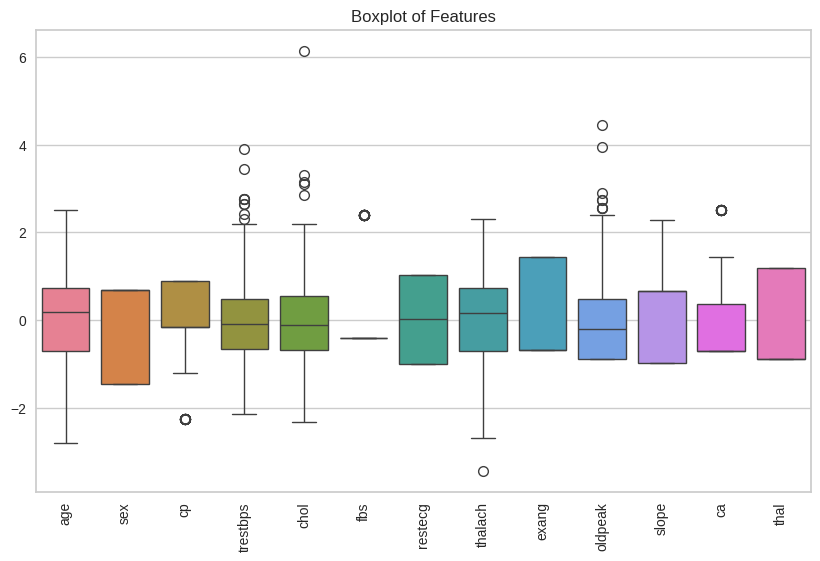

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_scaled.drop(columns=['num']))
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
plt.show()

### Correlation Matrix

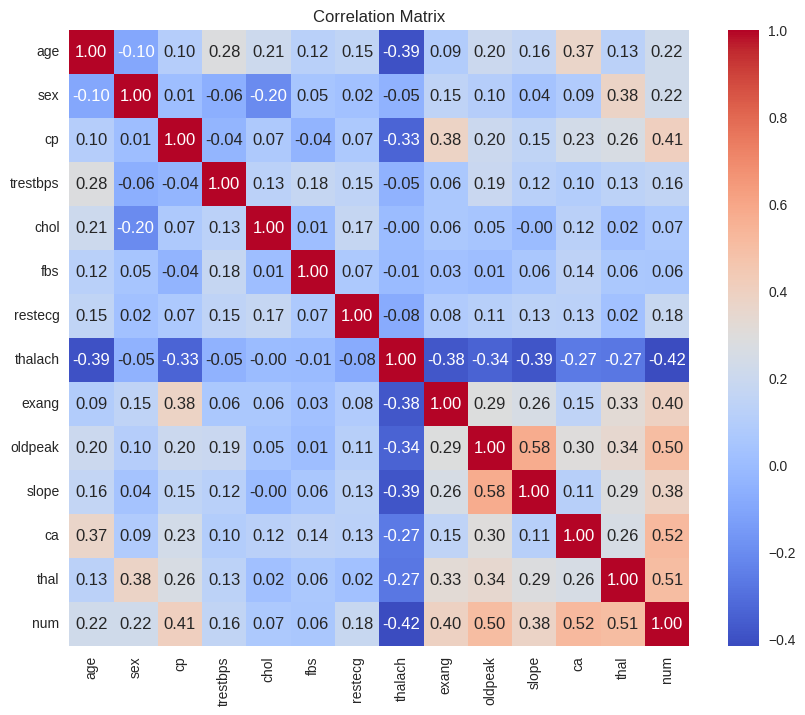

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_scaled.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### Pair Plot (Before PCA)

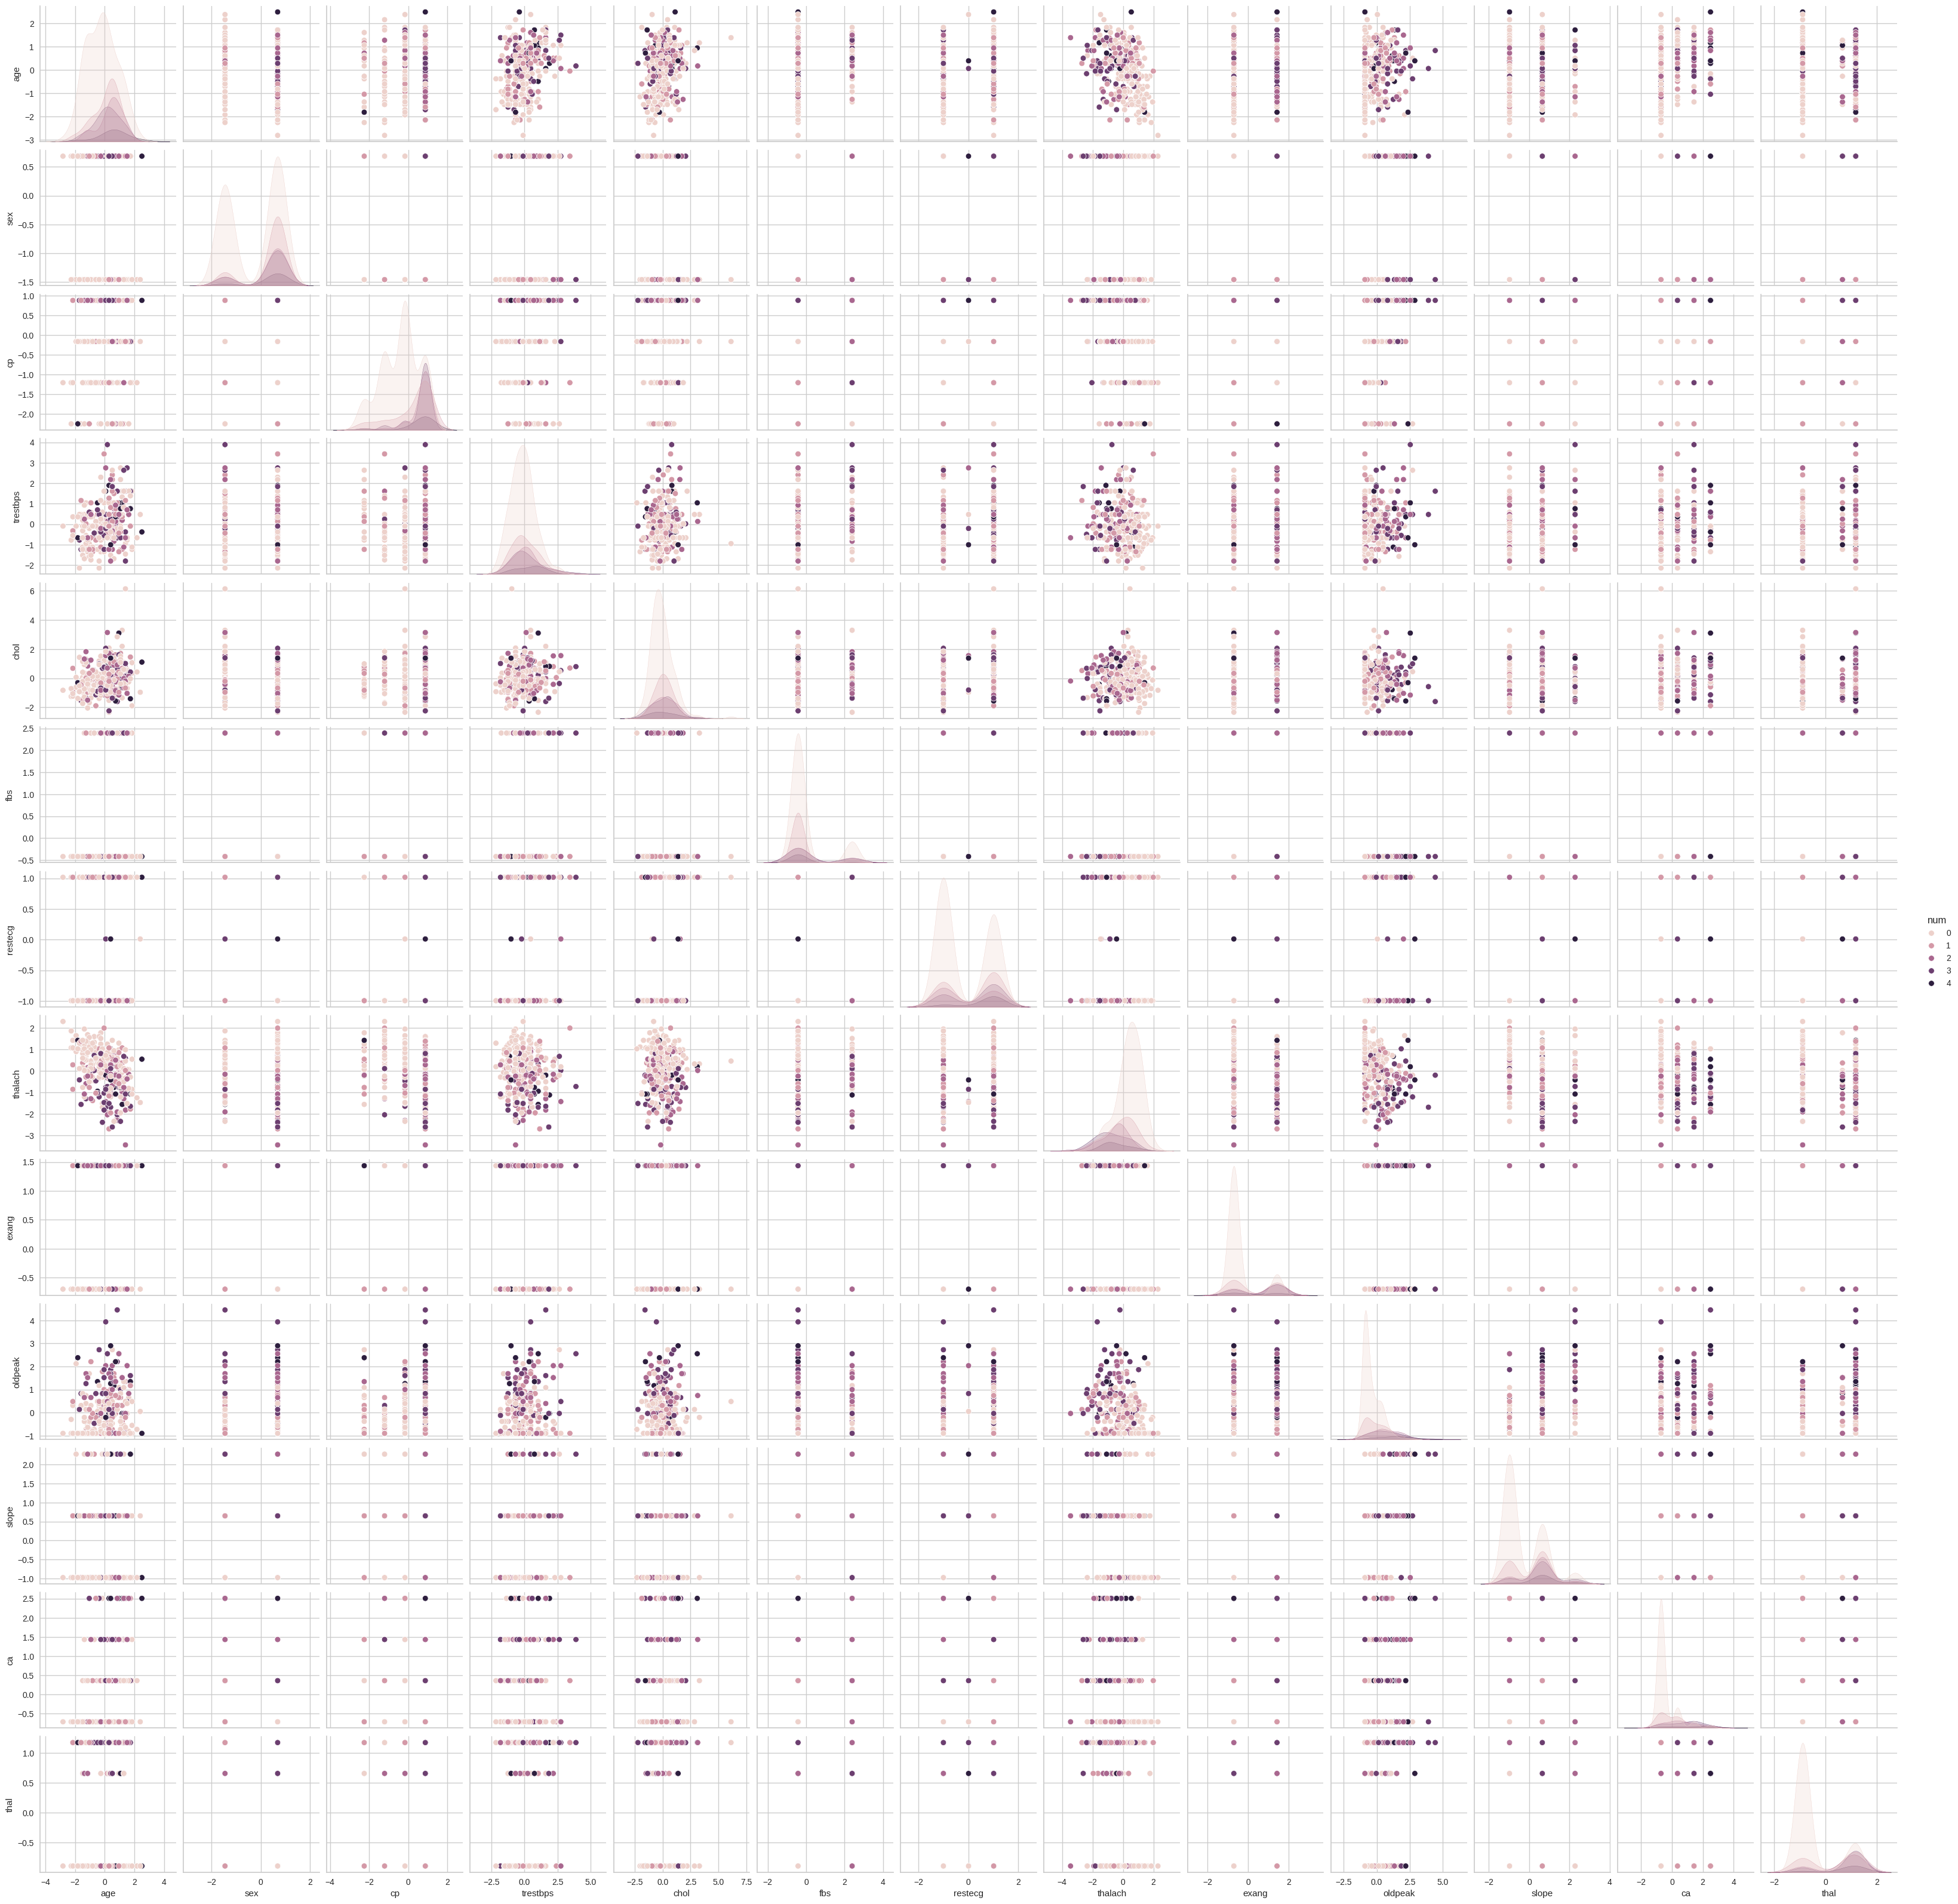

In [ ]:
sns.pairplot(df_scaled, hue='num', diag_kind='kde')
plt.show()

### Scatter Plot with Regression Line

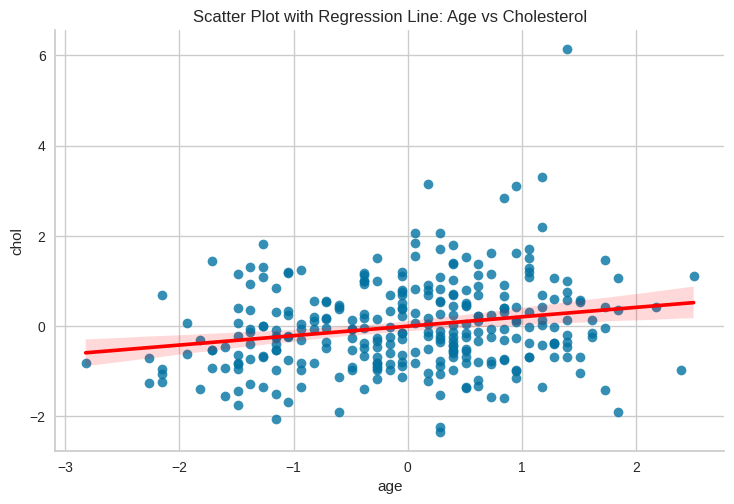

In [ ]:
sns.lmplot(x='age', y='chol', data=df_scaled, aspect=1.5, line_kws={"color": "red"})
plt.title('Scatter Plot with Regression Line: Age vs Cholesterol')
plt.show()

## 3. Principal Component Analysis (PCA)

#### Apply PCA

In [ ]:
pca = PCA()
pca_components = pca.fit_transform(df_scaled.drop(columns=['num']))
explained_variance = pca.explained_variance_ratio_


#### Compute eigenvalues & eigenvectors

In [ ]:
cov_matrix = np.cov(df_scaled.drop(columns=['num']).T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

#### Scree Plot for Eigenvalues

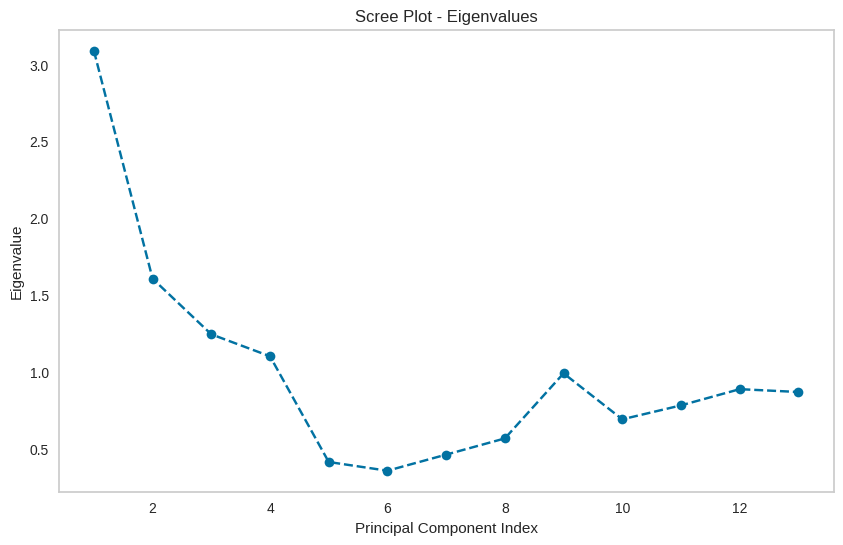

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--', color='b')
plt.title('Scree Plot - Eigenvalues')
plt.xlabel('Principal Component Index')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

### Scree Plot for Variance Explained

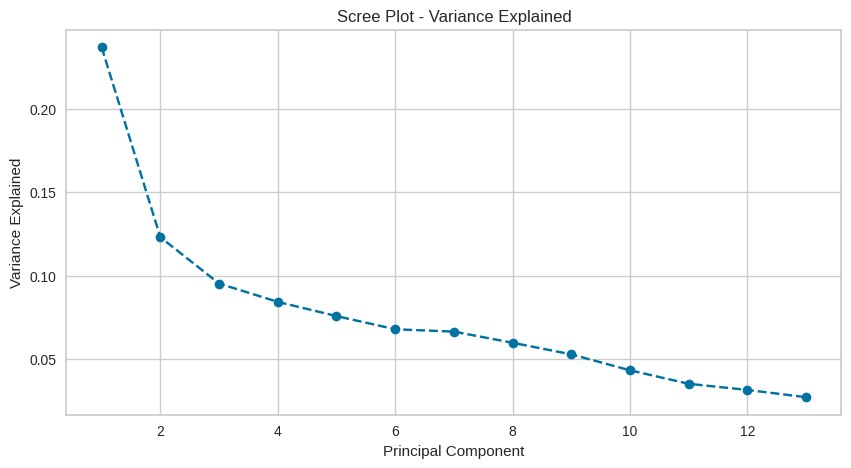

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot - Variance Explained')
plt.show()


### Choosing top 2 components

In [ ]:
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(df_scaled.drop(columns=['num']))

df_pca = pd.DataFrame(pca_transformed, columns=['PC1', 'PC2'])
df_pca['num'] = df['num']


### Scatter Plot of PCA Components

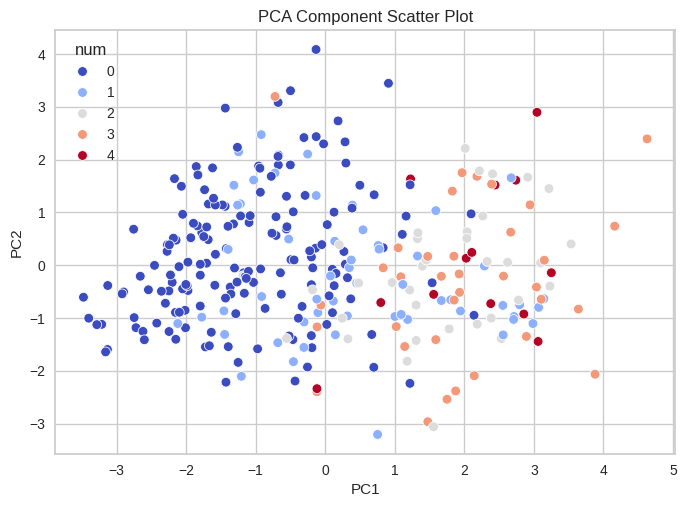

In [ ]:
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['num'], palette='coolwarm')
plt.title("PCA Component Scatter Plot")
plt.show()

## Compute Eigenvalues & Eigenvectors Before PCA

Eigenvalues (λ):
[3.09  1.605 1.243 1.1   0.412 0.355 0.46  0.565 0.989 0.69  0.78  0.886
 0.868]

Eigenvector matrix for the first two principal components (A):
[[-0.286  0.418]
 [-0.112 -0.452]
 [-0.285 -0.146]
 [-0.166  0.377]
 [-0.091  0.439]
 [-0.081  0.194]
 [-0.15   0.269]
 [ 0.389  0.046]
 [-0.333 -0.21 ]
 [-0.397 -0.06 ]
 [-0.354 -0.081]
 [-0.307  0.157]
 [-0.345 -0.272]]


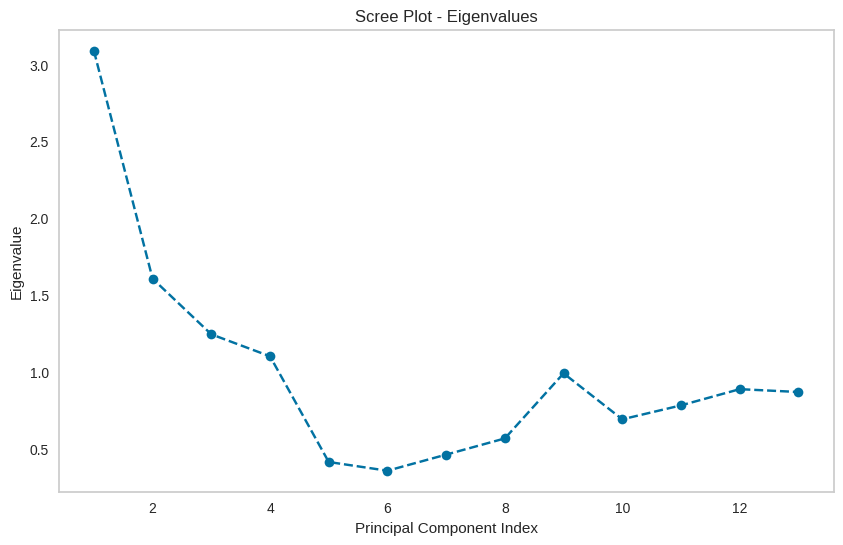

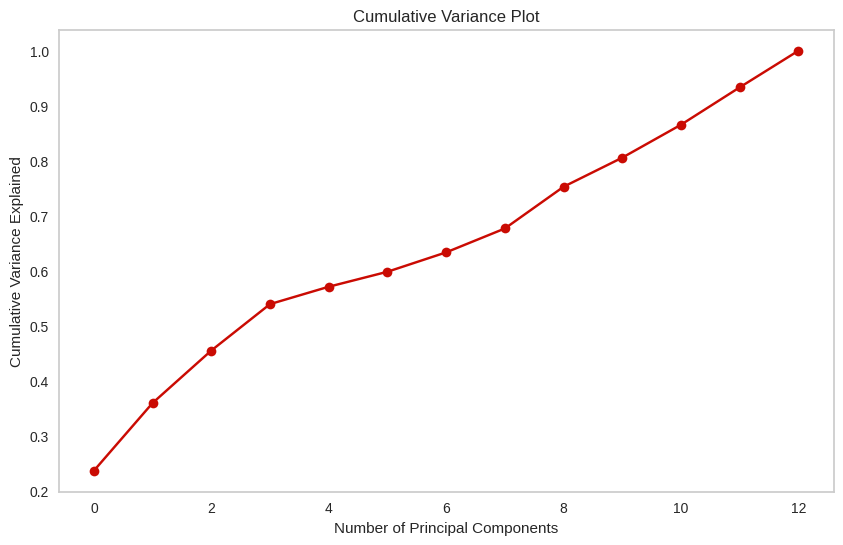

In [ ]:
# Compute covariance matrix
cov_matrix = np.cov(df_scaled.drop(columns=['num']).T)

# Compute eigenvalues & eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Display eigenvalues
print("Eigenvalues (λ):")
print(np.round(eigenvalues, 3))  # Rounded for readability

# Select the top 2 principal components
top_2_eigenvectors = eigenvectors[:, :2]

# Display the first two eigenvectors (Principal Components)
print("\nEigenvector matrix for the first two principal components (A):")
print(np.round(top_2_eigenvectors, 3))  # Rounded for readability

# Plot Scree Plot for Eigenvalues
plt.figure(figsize=(10,6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--', color='b')
plt.xlabel('Principal Component Index')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot - Eigenvalues')
plt.grid()
plt.show()

# Plot Cumulative Variance Explained
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(eigenvalues) / np.sum(eigenvalues), marker='o', linestyle='-', color='r')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Plot')
plt.grid()
plt.show()

## Pareto Plot (Explained Variance)

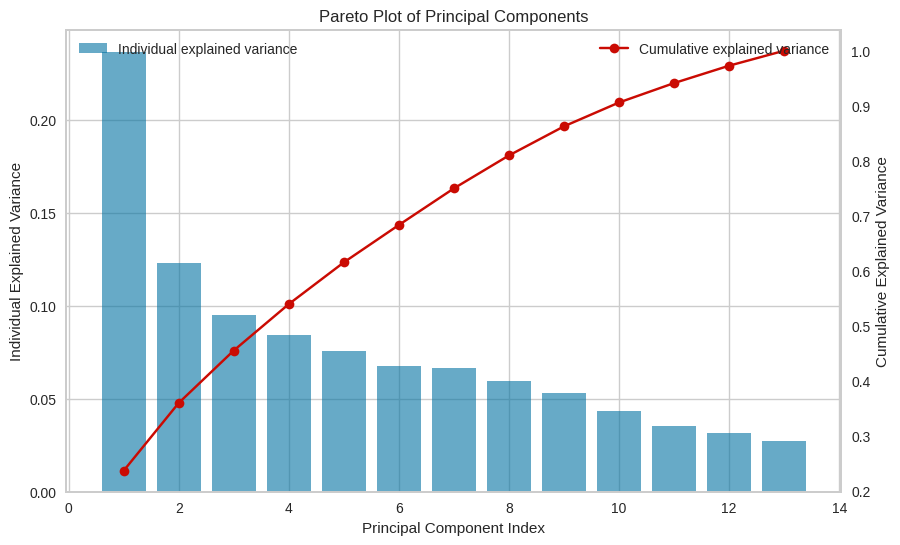

In [ ]:
# Compute PCA again with all components
pca_full = PCA()
pca_full.fit(df_scaled.drop(columns=['num']))

# Explained variance ratio
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Create Pareto Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for individual explained variance
ax1.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label="Individual explained variance")

# Line plot for cumulative explained variance
ax2 = ax1.twinx()
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='r', label="Cumulative explained variance")

# Labels and legend
ax1.set_xlabel('Principal Component Index')
ax1.set_ylabel('Individual Explained Variance')
ax2.set_ylabel('Cumulative Explained Variance')
ax1.set_title('Pareto Plot of Principal Components')

# Combine legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid()
plt.show()

## PCA Biplot (Top 2 Components)

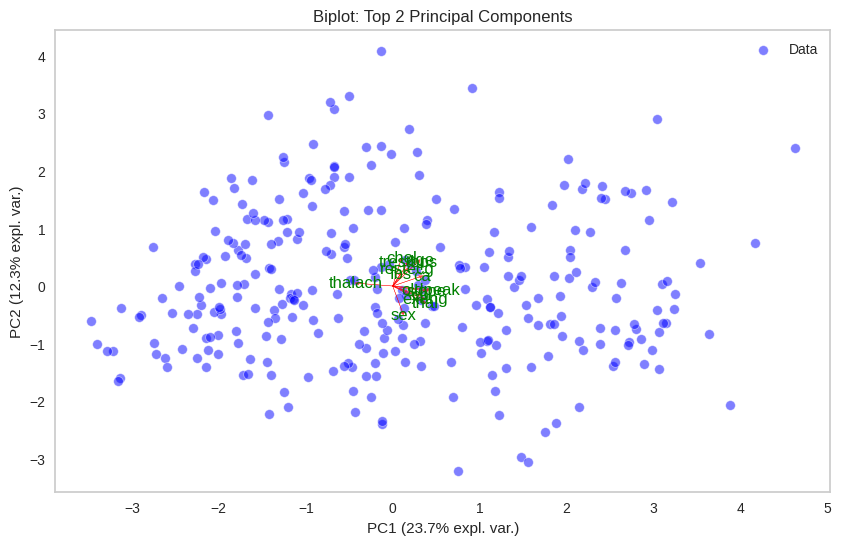

In [ ]:
# Compute PCA again with 2 components
pca_2 = PCA(n_components=2)
pca_transformed = pca_2.fit_transform(df_scaled.drop(columns=['num']))
pca_components = pd.DataFrame(pca_transformed, columns=['PC1', 'PC2'])

# Get PCA loadings (feature influence)
loadings = pca_2.components_.T

# Create Biplot
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot of PCA data points
sns.scatterplot(x=pca_components["PC1"], y=pca_components["PC2"], alpha=0.5, color="blue", label="Data", ax=ax)

# Plot feature vectors (arrows)
for i, feature in enumerate(df_scaled.drop(columns=['num']).columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='red', alpha=0.7, head_width=0.05, head_length=0.05)
    plt.text(loadings[i, 0] * 1.1, loadings[i, 1] * 1.1, feature, color='green', ha='center', va='center')

# Labels and title
plt.xlabel(f"PC1 ({pca_2.explained_variance_ratio_[0]:.1%} expl. var.)")
plt.ylabel(f"PC2 ({pca_2.explained_variance_ratio_[1]:.1%} expl. var.)")
plt.title("Biplot: Top 2 Principal Components")
plt.grid()
plt.legend()
plt.show()

# 4. Machine Learning Model Selection (PyCaret)

,Description,Value
0,Session id,42
1,Target,num
2,Target type,Multiclass
3,Original data shape,"(303, 3)"
4,Transformed data shape,"(303, 3)"
5,Transformed train set shape,"(212, 3)"
6,Transformed test set shape,"(91, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6132,0.7104,0.6132,0.5569,0.5718,0.3584,0.3727,0.0730
qda,Quadratic Discriminant Analysis,0.6035,0.0000,0.6035,0.5212,0.5463,0.3270,0.3469,0.0260
nb,Naive Bayes,0.6030,0.7341,0.6030,0.5198,0.5453,0.3398,0.3604,0.0360
rf,Random Forest Classifier,0.5946,0.7393,0.5946,0.5796,0.5717,0.3492,0.3586,0.1940
svm,SVM - Linear Kernel,0.5939,0.0000,0.5939,0.4719,0.5146,0.3124,0.3429,0.0650
et,Extra Trees Classifier,0.5857,0.7235,0.5857,0.5368,0.5503,0.3253,0.3367,0.2590
lr,Logistic Regression,0.5848,0.0000,0.5848,0.5049,0.5259,0.2962,0.3152,0.0430
lda,Linear Discriminant Analysis,0.5848,0.0000,0.5848,0.5222,0.5342,0.3066,0.3236,0.0330
ridge,Ridge Classifier,0.5803,0.0000,0.5803,0.4153,0.4770,0.2492,0.2880,0.0230
lightgbm,Light Gradient Boosting Machine,0.5755,0.7454,0.5755,0.5292,0.5452,0.3273,0.3353,0.1940


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.7737,0.5000,0.4286,0.4615,0.1741,0.1776
1,0.6364,0.7628,0.6364,0.5000,0.5424,0.3125,0.3685
2,0.5238,0.0000,0.5238,0.5031,0.5116,0.1985,0.2025
3,0.5238,0.7299,0.5238,0.4722,0.4923,0.2251,0.2303
4,0.6190,0.8383,0.6190,0.5984,0.5970,0.4105,0.4228
5,0.6667,0.8147,0.6667,0.6122,0.6286,0.4411,0.4551
6,0.7143,0.8053,0.7143,0.6735,0.6696,0.5245,0.5454
7,0.6667,0.7608,0.6667,0.6013,0.6243,0.4635,0.4717
8,0.7143,0.8050,0.7143,0.6740,0.6933,0.5209,0.5235


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


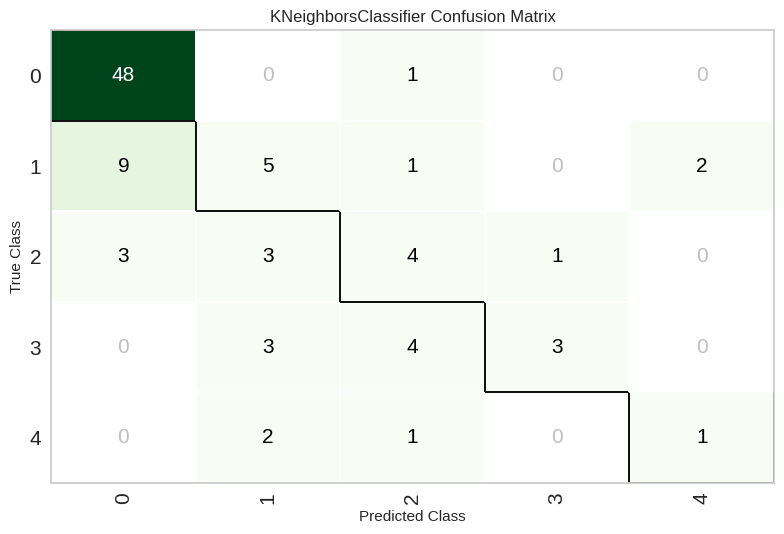

⚠️ Feature importance plot is not available for this model. Using SHAP instead.


  0%|          | 0/303 [00:00<?, ?it/s]

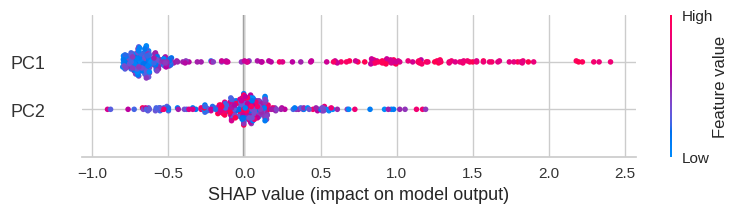

In [ ]:
import shap

# Model Setup and Training
clf_setup = pc.setup(data=df_pca, target='num', session_id=42)

# Compare Models
best_model = pc.compare_models()

# Tune and Finalize Best Model
tuned_model = pc.tune_model(best_model)
final_model = pc.finalize_model(tuned_model)

# Model Evaluation - Confusion Matrix
pc.plot_model(final_model, plot='confusion_matrix')

# Check if feature importance is available
if hasattr(final_model, "coef_") or hasattr(final_model, "feature_importances_"):
    pc.plot_model(final_model, plot='feature')
else:
    print("⚠️ Feature importance plot is not available for this model. Using SHAP instead.")

    # Extract the actual trained model from PyCaret's pipeline
    actual_model = final_model.named_steps["actual_estimator"]

    # Sample data for SHAP efficiency
    X_sample = df_pca[['PC1', 'PC2']].sample(100, random_state=42).to_numpy()

    # Initialize SHAP Kernel Explainer
    explainer = shap.KernelExplainer(actual_model.predict, X_sample)
    shap_values = explainer.shap_values(df_pca[['PC1', 'PC2']].to_numpy())

    # Plot SHAP Summary
    shap.summary_plot(shap_values, df_pca[['PC1', 'PC2']])

Leaderboard Columns: ['Accuracy', 'AUC', 'Recall', 'Prec.', 'F1', 'Kappa', 'MCC']


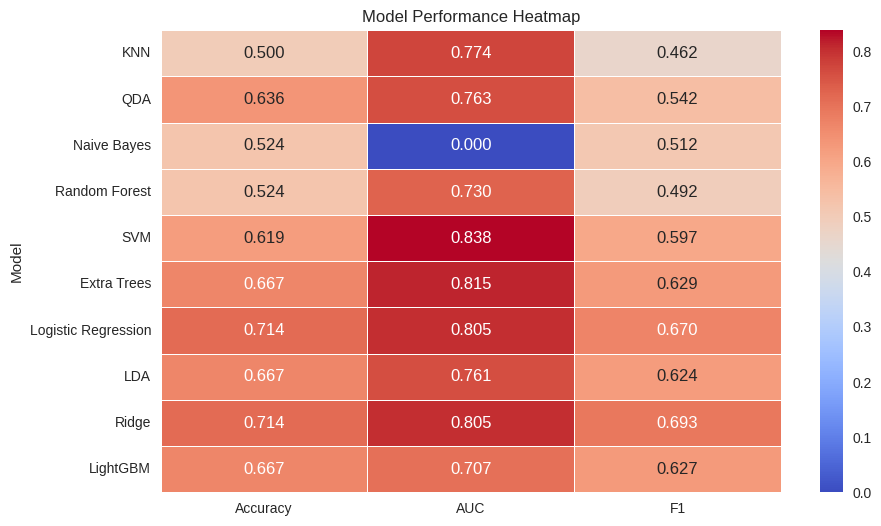

In [ ]:
# Get leaderboard from PyCaret
leaderboard = pc.pull()

# Print available columns for debugging
print("Leaderboard Columns:", leaderboard.columns.tolist())

# Manually create a model list (since PyCaret doesn’t include it)
model_names = ["KNN", "QDA", "Naive Bayes", "Random Forest", "SVM", "Extra Trees",
               "Logistic Regression", "LDA", "Ridge", "LightGBM", "GBC", "Decision Tree", "XGBoost"]

# Ensure the length matches the leaderboard
leaderboard["Model"] = model_names[:len(leaderboard)]

# Set "Model" as index
leaderboard = leaderboard.set_index("Model")

# Select key metrics
metrics = ["Accuracy", "AUC", "F1"]
leaderboard = leaderboard[metrics].head(10)  # Show top 10 models

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(leaderboard, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title("Model Performance Heatmap")
plt.show()

##ROC Curve for Best Model

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.6703,0.9095,0.6703,0.6436,0.6401,0.4482,0.4585


Predictions DataFrame Columns: ['PC1', 'PC2', 'num', 'prediction_label', 'prediction_score']


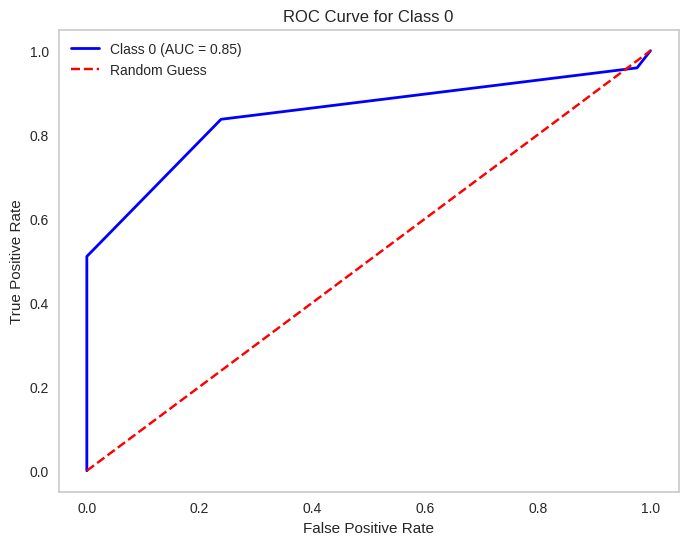

In [ ]:
from sklearn.metrics import roc_curve, auc
from collections import Counter


# Get predictions for the final model
predictions = pc.predict_model(final_model)

# Print available columns for debugging
print("Predictions DataFrame Columns:", predictions.columns.tolist())

# Assign correct column names
label_col = "num"  # True class labels
score_col = "prediction_score" if "prediction_score" in predictions.columns else None

# Ensure probability scores exist
if score_col:
    y_true = predictions[label_col]  # True labels
    y_scores = predictions[score_col]  # Predicted probability scores

    # Select the most frequent class to compute ROC
    most_common_class = Counter(y_true).most_common(1)[0][0]
    y_binary = (y_true == most_common_class).astype(int)  # Convert to binary (class vs rest)

    # Compute ROC Curve
    fpr, tpr, _ = roc_curve(y_binary, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f"Class {most_common_class} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random Guess")

    # Labels and Title
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for Class {most_common_class}")
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("⚠️ ROC Curve is not available as the model does not support probability predictions.")
